# ---------------  Outliers   ---------------

## Outliers & Impact on Machine Learning!!!

#### Which Machine Learning models are Sensitive to Outliers?

1. Naivye Bayes Classifier --------------------- Not Sensitive to Outliers 
2. SVM ----------------------------------------- Not Sensitive
3. Linear Regression --------------------------- Sensitive to Outliers
4. Logistic Regression ------------------------- Sensitive
5. Decision Tree Regressor or Classifier ------- Not Sensitive
6. Ensemble(RF- Rain Forest, XGBoost, GB)------- NOt Sensitive
7. KNN ----------------------------------------- Not Sensitive
8. Kmeans -------------------------------------- Sensitive
9. Hierarichal --------------------------------- Sensitive
10. PCA ---------------------------------------- Sensitive
11. Neural Networks ---------------------------- Sensitive

In [3]:
import pandas as pd

In [7]:
df = pd.read_csv("C:\\Users\\amita\\Downloads\\Krish Naik\\feature engnieering\\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Age'].isnull().sum()

177

In [9]:
import seaborn as sns

C:\Users\amita\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age', ylabel='Density'>

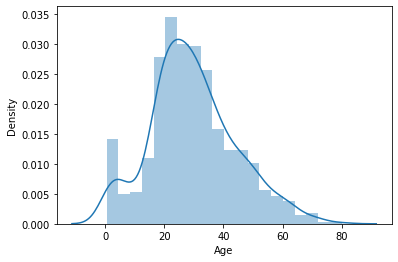

In [10]:
sns.distplot(df["Age"].dropna())

C:\Users\amita\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age', ylabel='Density'>

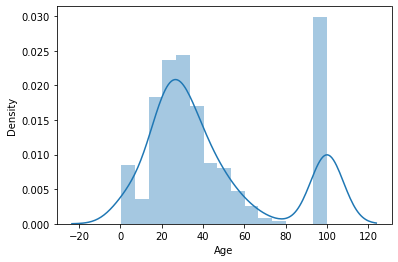

In [11]:
sns.distplot(df["Age"].fillna(100))

## Gaussion Disotribution 

#####  (means Normal distribution):

Text(0, 0.5, 'No of Passenger')

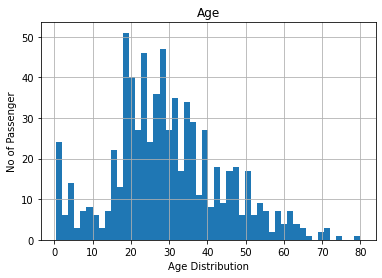

In [12]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age Distribution')
figure.set_ylabel('No of Passenger')

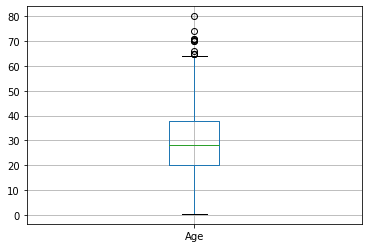

In [13]:
# Box plot for outliers:

figure = df.boxplot(column='Age')

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### If the data is Normally Distributed(Gaussian) we will use below method:

In [17]:
### Assuming Age follows Gaussian Distribution, we will calculatee the Boundries which diffrenciate the outliers.

upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()
print("Lower Age Boundary: ", lower_boundary)
print("Upper Age Boundary: ", upper_boundary)
print("Mean of the Age", df['Age'].mean())


Lower Age Boundary:  -13.88037434994331
Upper Age Boundary:  73.27860964406095
Mean of the Age 29.69911764705882


### If features are Skewed, we use the below Technique.

Text(0, 0.5, 'No of Passenger')

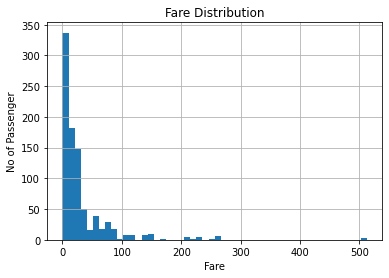

In [18]:
figure = df.Fare.hist(bins=50)
figure.set_title("Fare Distribution")
figure.set_xlabel("Fare")
figure.set_ylabel("No of Passenger")

* here the data are right skewed not a normally or gaussion distributed.
* So, we can find many outliers.

<AxesSubplot: >

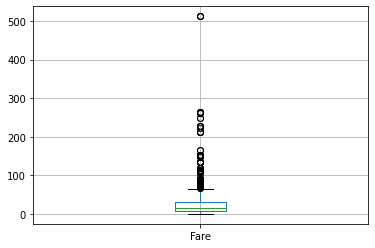

In [19]:
# Let's check outlier using Boxplot:

df.boxplot(column="Fare")

In [21]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Calculate the IQR as daat are right skewd distributed:

In [22]:
# Lets compute Interquantile range to calculate the boundries.

IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [23]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print("Lower bridge: ", lower_bridge)
print("Upper bridge: ", upper_bridge)

Lower bridge:  -26.724
Upper bridge:  65.6344


In [24]:
# Extreme Outliers means(IQR*3)

lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print("Extreme Lower bridge: ", lower_bridge)
print("Extreme Upper bridge: ", upper_bridge)

Extreme Lower bridge:  -61.358399999999996
Extreme Upper bridge:  100.2688


In [26]:
data = df.copy()
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* as we saw for 'Age' upper boundary is 73.28.
* So, we will consider 73 is as upper boundary 
* and after that all features become outliers. 

In [27]:
data.loc[data['Age']>=73, 'Age'] = 73

* likewise for 'Fare' feature, upper boundry for 'Fare' is 100.26, consider 100.
* and here we are calculating extreme outliers (IQR*3)
* which is relevant to the data. 
* after 100 data consider as ouliers.

In [28]:
data.loc[data['Fare']>=100, 'Fare'] = 100

Text(0, 0.5, 'No of Passenger')

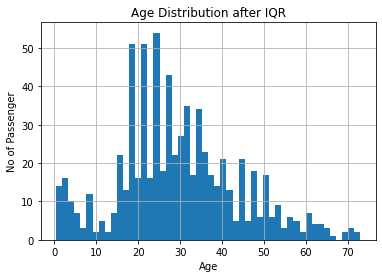

In [30]:
# Check with hist plot for 'Age' column:

figure = data.Age.hist(bins=50)
figure.set_title("Age Distribution after IQR")
figure.set_xlabel("Age")
figure.set_ylabel("No of Passenger")

Text(0, 0.5, 'No of Passenger')

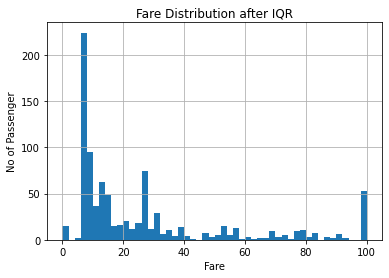

In [31]:
# Check with hist plot for 'Fare' column:

figure = data.Fare.hist(bins=50)
figure.set_title("Fare Distribution after IQR")
figure.set_xlabel("Fare")
figure.set_ylabel("No of Passenger")

### Model Implimentation:

In [32]:
# data spliting:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', "Fare"]].fillna(0), data["Survived"], test_size=0.3)

### Logistic Regression:

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test) # for roc_auc score 'predict_proba' is must.

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred1[:, 1])))

Accuracy_score: 0.6753731343283582
roc_auc_score: 0.7151149155722325
